# Assignment 5

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

## Panel Data
### 1.1

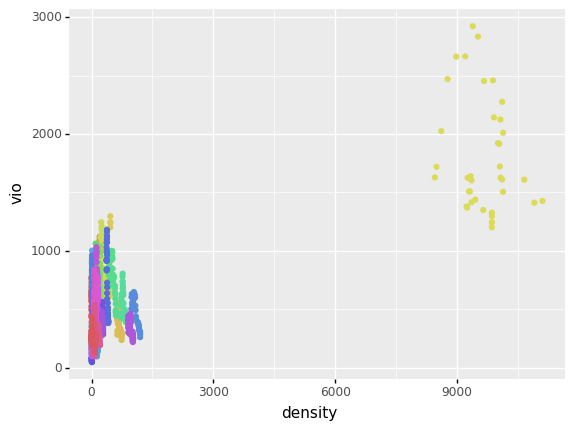

<ggplot: (382010522)>

In [3]:
df1 = pd.read_csv("assignment5_part1.csv")
ggplot(df1, aes("density", "vio", color = "state")) + geom_point() + theme(legend_position = "none")

In [5]:
df1.sort_values("vio", ascending=False)

,state,year,stateid,vio,mur,rap,aga,bur,auto,shall,density,rpcpi,rpcui,rpcim,pbm1019,pbm2029,pwm1019,pwm2029
320,District of Columbia,1993,11,2921.799308,78.546713,56.055363,1557.612457,1995.501730,1394.809689,0.000000,9386.937500,20680.277344,238.062286,411.764709,3.423393,5.249515,1.188671,3.652417
319,District of Columbia,1992,11,2832.767402,75.212224,36.502547,1454.668930,1820.203735,1548.047538,0.000000,9514.380859,20451.888672,279.401276,371.347107,3.547176,5.595849,1.160253,3.756528
321,District of Columbia,1994,11,2662.631579,70.000000,43.684211,1441.754386,1760.877193,1449.298246,0.000000,9201.661133,20785.425781,128.205124,437.246979,3.372320,4.880687,1.237916,3.611266
322,District of Columbia,1995,11,2661.371841,64.981949,52.707581,1304.693141,1838.447653,1839.891697,0.000000,8978.387695,20532.152344,121.391075,446.194214,3.390153,4.530967,1.283212,3.564114
323,District of Columbia,1996,11,2469.797422,73.112339,47.882136,1162.062615,1809.944751,1837.016575,0.000000,8766.661133,21020.394531,108.986618,462.077759,3.338826,4.215333,1.316990,3.504541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,North Dakota,1980,38,53.951569,1.226172,9.502833,35.558989,488.323010,179.174388,0.000000,9.418715,9580.096680,70.388351,94.660194,0.042628,0.115355,8.532760,9.804722
1298,North Dakota,1983,38,53.676471,2.058824,12.500000,31.323529,436.323529,129.117647,0.000000,9.764618,11462.851562,95.381523,90.361443,0.042413,0.119701,7.631025,9.780474
1299,North Dakota,1984,38,53.644315,1.166181,13.119534,31.632653,399.125364,110.787172,0.000000,9.819582,11807.506836,65.447548,93.359001,0.042322,0.119472,7.412817,9.599749
1301,North Dakota,1986,38,51.251841,1.030928,11.634757,31.664212,385.125184,119.882180,1.000000,9.661068,11884.124023,72.080292,104.014595,0.043317,0.117851,7.166383,8.920860


The state that stands out is District of Columbia. From a preliminary glance, it seems that higher density of people is correlated with higher violent crime rate.

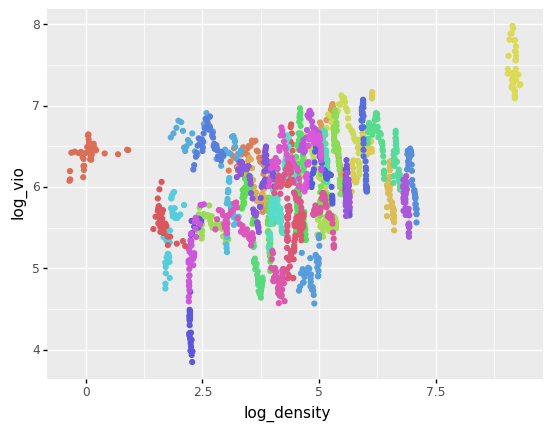

<ggplot: (382222291)>

In [7]:
df1["log_density"] = np.log(df1["density"])
df1["log_vio"] = np.log(df1["vio"])
ggplot(df1, aes("log_density", "log_vio", color = "state")) + geom_point() + theme(legend_position = "none")

Log transforming is useful because much of the data is bunched together. Also, it could be useful to think in terms of percent changes to violence rate.

### 1.2

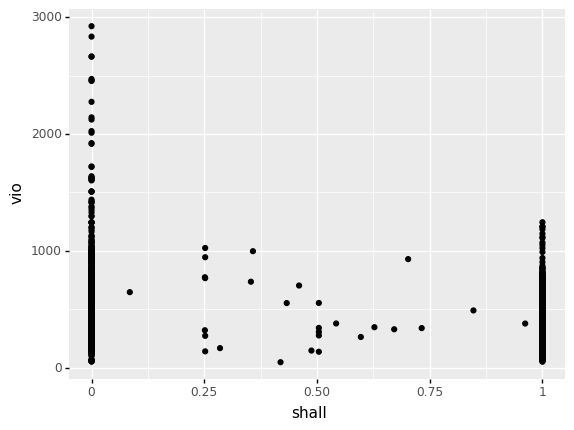

<ggplot: (688041540)>

In [11]:
ggplot(df1, aes(y = "vio", x = "shall")) + geom_point()

It seems like having a shall-issue law decreases the violence rate, but the violence rate divide could be caused by other factors too. 

### 1.3

In [19]:
import statsmodels.api as smf
from linearmodels import PooledOLS
df1_indexed = df1.set_index(["state", "year"])
exog = smf.add_constant(df1_indexed["shall"])
mod = PooledOLS(df1_indexed['vio'], exog)
pooled_res = mod.fit(cov_type='clustered', cluster_entity = True, cluster_time = True)
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                    vio   R-squared:                        0.0623
Estimator:                  PooledOLS   R-squared (Between):              0.1042
No. Observations:                1938   R-squared (Within):              -0.1282
Date:                Thu, May 05 2022   R-squared (Overall):              0.0623
Time:                        02:16:30   Log-likelihood                -1.374e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      128.57
Entities:                          51   P-value                           0.0000
Avg Obs:                       38.000   Distribution:                  F(1,1936)
Min Obs:                       38.000                                           
Max Obs:                       38.000   F-statistic (robust):             6.5506
                            

The beta1 is significant given the p-value. It's saying that a state in a given year with a shall-carry law in place for the entire year has 150.81 less incidents of violence per 100k people. This aligns with the view discussed in 1.2

### 1.4

In [33]:
from linearmodels import PanelOLS
mod2 = PanelOLS(df1_indexed['vio'], exog, entity_effects=True, time_effects=False)
state_fixed_res = mod2.fit(cov_type='clustered', cluster_entity = True, cluster_time = True)
print(state_fixed_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    vio   R-squared:                        0.0066
Estimator:                   PanelOLS   R-squared (Between):              0.0235
No. Observations:                1938   R-squared (Within):               0.0066
Date:                Thu, May 05 2022   R-squared (Overall):              0.0205
Time:                        02:41:46   Log-likelihood                -1.213e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      12.445
Entities:                          51   P-value                           0.0004
Avg Obs:                       38.000   Distribution:                  F(1,1886)
Min Obs:                       38.000                                           
Max Obs:                       38.000   F-statistic (robust):             1.8421
                            

The beta1 is isn't significant given the p-value. It's saying that a state in a given year with a shall-carry law in place for the entire year has 27 less incidents of violence per 100k people. It's smaller than the pooled beta1, indicating that there was a lot of factors within states that also affected the violence rate.

### 1.5

In [31]:
mod3 = PanelOLS(df1_indexed['vio'], exog, entity_effects=True, time_effects=True)
state_time_fixed_res = mod3.fit(cov_type='clustered', cluster_entity = True, cluster_time = True)
print(state_time_fixed_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    vio   R-squared:                        0.0061
Estimator:                   PanelOLS   R-squared (Between):             -0.0288
No. Observations:                1938   R-squared (Within):              -0.0229
Date:                Thu, May 05 2022   R-squared (Overall):             -0.0277
Time:                        02:39:59   Log-likelihood                -1.181e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      11.322
Entities:                          51   P-value                           0.0008
Avg Obs:                       38.000   Distribution:                  F(1,1849)
Min Obs:                       38.000                                           
Max Obs:                       38.000   F-statistic (robust):             0.9817
                            

Beta1 isn't significant in this model. It's significantly different from the earlier beta1s because it's positive, indicating that the shall-carry law actually increased violence rates. It seems that other factors across states and time were causing the changes in violence rate.

### 1.6

In [37]:
exog = smf.add_constant(df1_indexed[["shall", "rpcpi", "rpcui", 'rpcim', 'density', 'pbm1019', 'pbm2029', 'pwm1019', 'pwm2029']])
mod = PanelOLS(df1_indexed.vio, exog, entity_effects=True, time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity = True, cluster_time = True)
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    vio   R-squared:                        0.3399
Estimator:                   PanelOLS   R-squared (Between):             -3.3848
No. Observations:                1938   R-squared (Within):               0.3399
Date:                Thu, May 05 2022   R-squared (Overall):             -2.7125
Time:                        02:52:16   Log-likelihood                -1.174e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      107.44
Entities:                          51   P-value                           0.0000
Avg Obs:                       38.000   Distribution:                  F(9,1878)
Min Obs:                       38.000                                           
Max Obs:                       38.000   F-statistic (robust):             28.737
                            

The beta1 has become smaller in magnitude and it's p-value is much greater.

In [38]:
exog = smf.add_constant(df1_indexed[["shall", "rpcpi", "rpcui", 'rpcim', 'density', 'pbm1019', 'pbm2029', 'pwm1019', 'pwm2029']])
mod = PanelOLS(df1_indexed.vio, exog, entity_effects=True, time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity = True, cluster_time = True)
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    vio   R-squared:                        0.2369
Estimator:                   PanelOLS   R-squared (Between):             -3.2305
No. Observations:                1938   R-squared (Within):               0.2885
Date:                Thu, May 05 2022   R-squared (Overall):             -2.5953
Time:                        02:54:38   Log-likelihood                -1.156e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      63.504
Entities:                          51   P-value                           0.0000
Avg Obs:                       38.000   Distribution:                  F(9,1841)
Min Obs:                       38.000                                           
Max Obs:                       38.000   F-statistic (robust):             21.310
                            

The beta1 here is negative instead of positive with a relatively big jump in value, and the p-value is much greater too.

Overall, I'll conclude that shall-issue laws don't have a significant affect on crime because in the models where we control for fixed effects and time effects, the coefficient of shall isn't significant. There may be other factors that are more important to causing violence.

## Binary Dependent Variables
### 2.1

In [43]:
df2 = pd.read_csv("assignment5_part2.csv")

In [96]:
df2.isna().sum()

age               0
race              0
earnwke         639
employed          0
unemployed        0
married           0
union             0
ne_states         0
so_states         0
ce_states         0
we_states         0
government        0
private           0
self              0
educ_lths         0
educ_hs           0
educ_somecol      0
educ_aa           0
educ_bac          0
educ_adv          0
female            0
dtype: int64

In [97]:
df2['earnwke'] = df2['earnwke'].fillna(df2.earnwke.median())

In [98]:
e = df2.employed.sum()
u = df2.unemployed.sum()
t = pd.DataFrame()
t['Status'] = ["Employed", "Unemployed"]
t['Percent'] = [e/(e+u)*100, u/(e+u)*100]
t

,Status,Percent
0,Employed,95.19791
1,Unemployed,4.80209


This indicates that most people surveyed employed in 2008 stayed employed in 2009.

### 2.2

In [99]:
reg_lin = smf.formula.ols(formula='employed ~ age + I(age**2)', data=df2)
results_lin = reg_lin.fit(cov_type = 'HC3')
print(results_lin.summary())

                            OLS Regression Results                            
Dep. Variable:               employed   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     37.41
Date:                Thu, 05 May 2022   Prob (F-statistic):           7.33e-17
Time:                        05:11:17   Log-Likelihood:                -1628.7
No. Observations:                5412   AIC:                             3263.
Df Residuals:                    5409   BIC:                             3283.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3075      0.067      4.593      

There is evidence that age is a determinant to employment in 2009 given the small p-value. Similarily, there's evidence that age^2 affected the probability. 

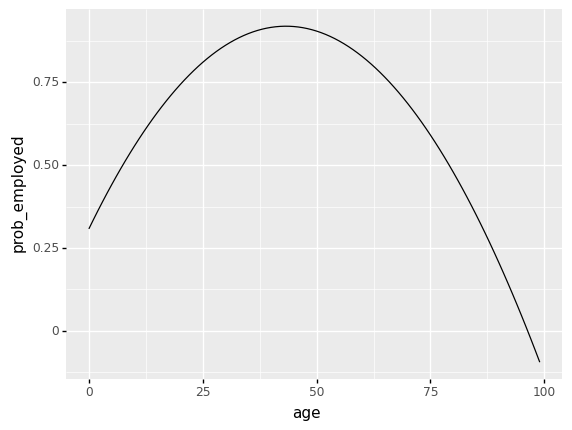

<ggplot: (704377352)>

In [100]:
pred = pd.DataFrame()
pred['age'] = np.arange(0, 100)
pred['prob_employed'] = results_lin.predict(pred['age'])
ggplot(pred, aes('age', 'prob_employed')) + geom_line()

### 2.3

In [113]:
reg_logit = smf.formula.logit(formula = 'employed ~ age + I(age**2)', data = df2)
results_logit = reg_logit.fit(disp = 0)
print(results_logit.summary())

                           Logit Regression Results                           
Dep. Variable:               employed   No. Observations:                 5412
Model:                          Logit   Df Residuals:                     5409
Method:                           MLE   Df Model:                            2
Date:                Thu, 05 May 2022   Pseudo R-squ.:                 0.02349
Time:                        05:43:58   Log-Likelihood:                -1986.4
converged:                       True   LL-Null:                       -2034.2
Covariance Type:            nonrobust   LLR p-value:                 1.775e-21
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.4898      0.437     -5.692      0.000      -3.347      -1.632
age             0.2255      0.023      9.885      0.000       0.181       0.270
I(age ** 2)    -0.0026      0.000     -9.518    

In [114]:
reg_logit = smf.formula.logit(formula = 'employed ~ age + I(age**2) + earnwke + race + married + female + ne_states + so_states + ce_states + we_states + educ_lths + educ_hs + educ_somecol + educ_aa + educ_bac + educ_adv', data = df2)
results_logit = reg_logit.fit(disp = True, cov_type = 'HC1')
print(results_logit.summary())

Optimization terminated successfully.
         Current function value: 0.361121
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               employed   No. Observations:                 5412
Model:                          Logit   Df Residuals:                     5397
Method:                           MLE   Df Model:                           14
Date:                Thu, 05 May 2022   Pseudo R-squ.:                 0.03924
Time:                        05:44:08   Log-Likelihood:                -1954.4
converged:                       True   LL-Null:                       -2034.2
Covariance Type:                  HC1   LLR p-value:                 8.342e-27
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.3754   7.21e+12  -1.91e-13      1.000   -1.41e+13    1.41e+13
age              0.1981

It seems like you more likely employed if you earned a lot and you were older (to a certain extent until the age^2 coefficent took over). Being nonwhite lowered your employment probability. 

### 2.4

In [115]:
reg_logit = smf.formula.logit(formula = 'unemployed ~ age + I(age**2) + earnwke + race + married + female + ne_states + so_states + ce_states + we_states + educ_lths + educ_hs + educ_somecol + educ_aa + educ_bac + educ_adv', data = df2)
results_logit = reg_logit.fit(disp = True, cov_type = 'HC1')
print(results_logit.summary())

Optimization terminated successfully.
         Current function value: 0.174155
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             unemployed   No. Observations:                 5412
Model:                          Logit   Df Residuals:                     5397
Method:                           MLE   Df Model:                           14
Date:                Thu, 05 May 2022   Pseudo R-squ.:                 0.03755
Time:                        05:44:19   Log-Likelihood:                -942.53
converged:                       True   LL-Null:                       -979.30
Covariance Type:                  HC1   LLR p-value:                 4.370e-10
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.6903   1.24e+07  -5.56e-08      1.000   -2.43e+07    2.43e+07
age             -0.1002

This model is telling us that being married and female decreases the probability of being unemployed. Age also decreases your liklihood of being employed to a certain point. 

Overall, there seems to be specification issues with this model, and likely the one above too, perhaps it has to do with the data being too many binary variables or statsmodels implementation of logit.

In [112]:
np.diagonal(results_logit.cov_params())

array([ 3.48060642e+27,  8.96100017e-05,  2.83023695e-08,  1.61770227e-02,
        2.08954501e-02,  1.95800150e-02,  3.48060642e+27,  3.48060642e+27,
        3.48060642e+27,  3.48060642e+27, -4.57354403e+12,  1.96942725e+13,
        7.48081123e+12,  3.24108147e+13,  8.16793245e+12,  8.83678022e+12])